In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #Supress unnecessary warnings for readability and cleaner presentation

In [2]:
datadir = '/data/Instacart/'

# Dataset ER-Model

![ER_MODLE](https://kaggle2.blob.core.windows.net/forum-message-attachments/183176/6539/instacartFiles.png)

# Products / Aisles / Departemnts

In [3]:
aisles = pd.read_csv(datadir +'aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
dept = pd.read_csv(datadir +'departments.csv')
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
products = pd.read_csv(datadir + 'products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
print("total products ", len(products) )
print("total aisles ", len(aisles) )
print("total department ", len(dept) )

total products  49688
total aisles  134
total department  21


In [7]:
# combine all above three into one dataframe
product_info = pd.merge(pd.merge(products, dept, on ='department_id', how = 'left'), aisles, on='aisle_id', how = 'left')
product_info.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


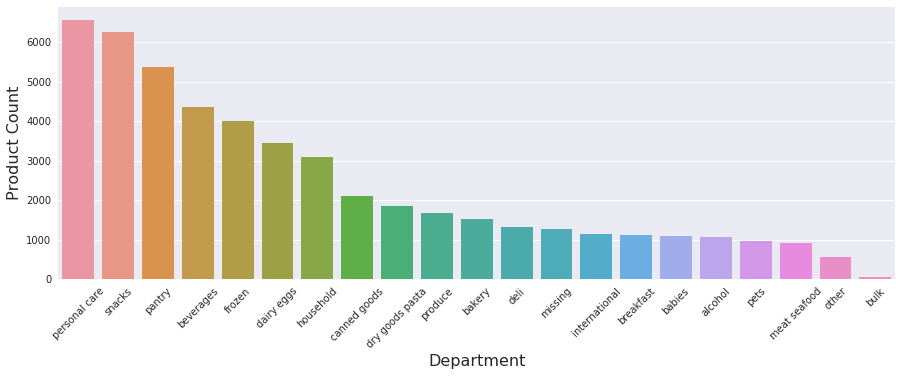

In [8]:
# products in each departments
plt.figure(figsize = (15,5))
dept_cnt = product_info.groupby('department').product_id.aggregate({'product_count':'count'}).reset_index()\
          .sort_values('product_count', ascending = False)
sns.barplot(x = 'department', y= 'product_count', data = dept_cnt)
plt.xticks(rotation=45)
plt.xlabel("Department",fontsize = 16)
plt.ylabel("Product Count",fontsize = 16)
plt.show()

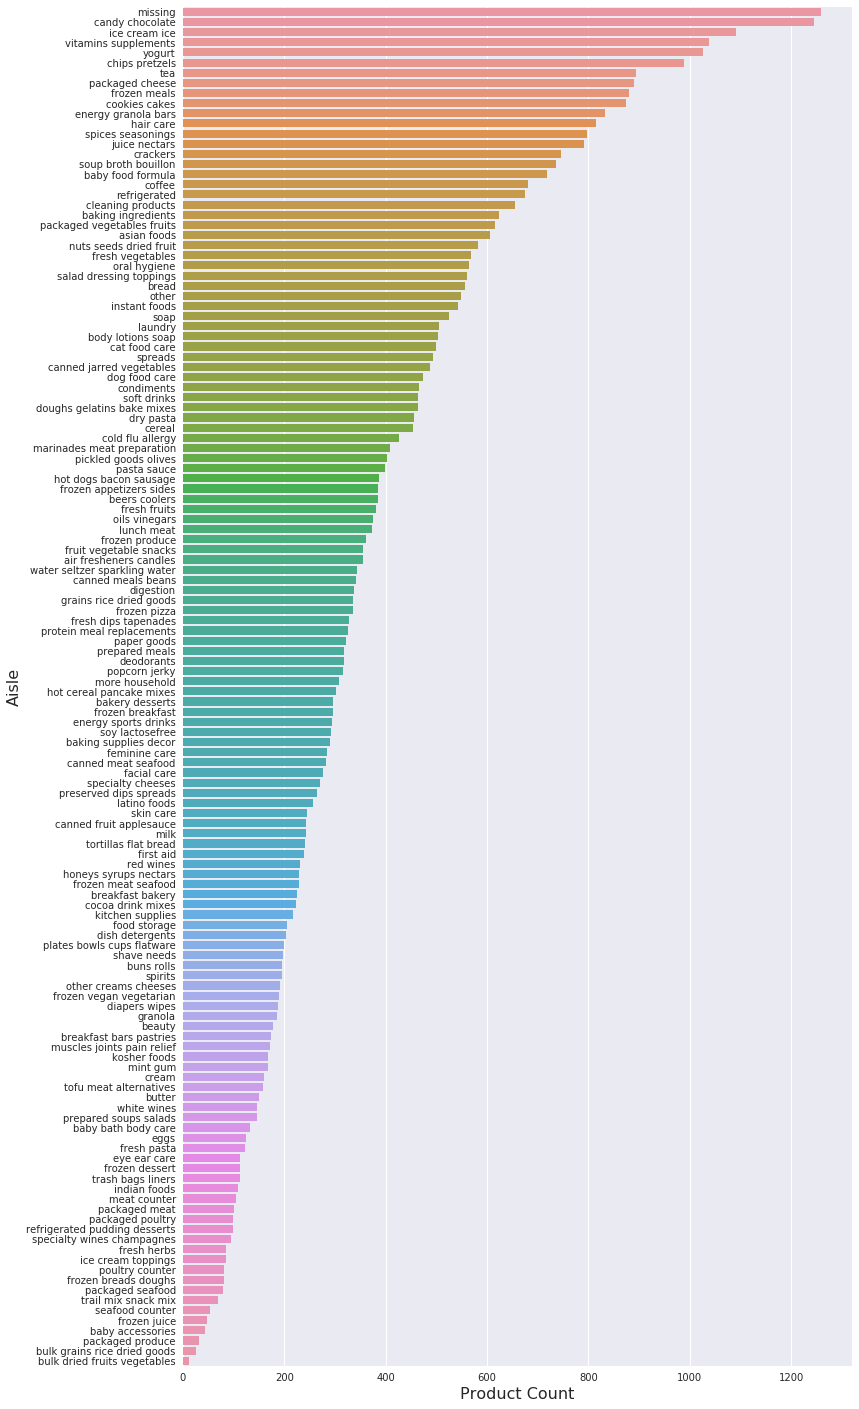

In [9]:
# products in each asile
plt.figure(figsize = (12,25))
aisle_cnt = product_info.groupby('aisle').product_id.aggregate({'product_count':'count'}).reset_index()\
            .sort_values('product_count', ascending = False)
sns.barplot(y = 'aisle', x= 'product_count', data = aisle_cnt)
plt.ylabel("Aisle",fontsize = 16)
plt.xlabel("Product Count",fontsize = 16)
plt.show()

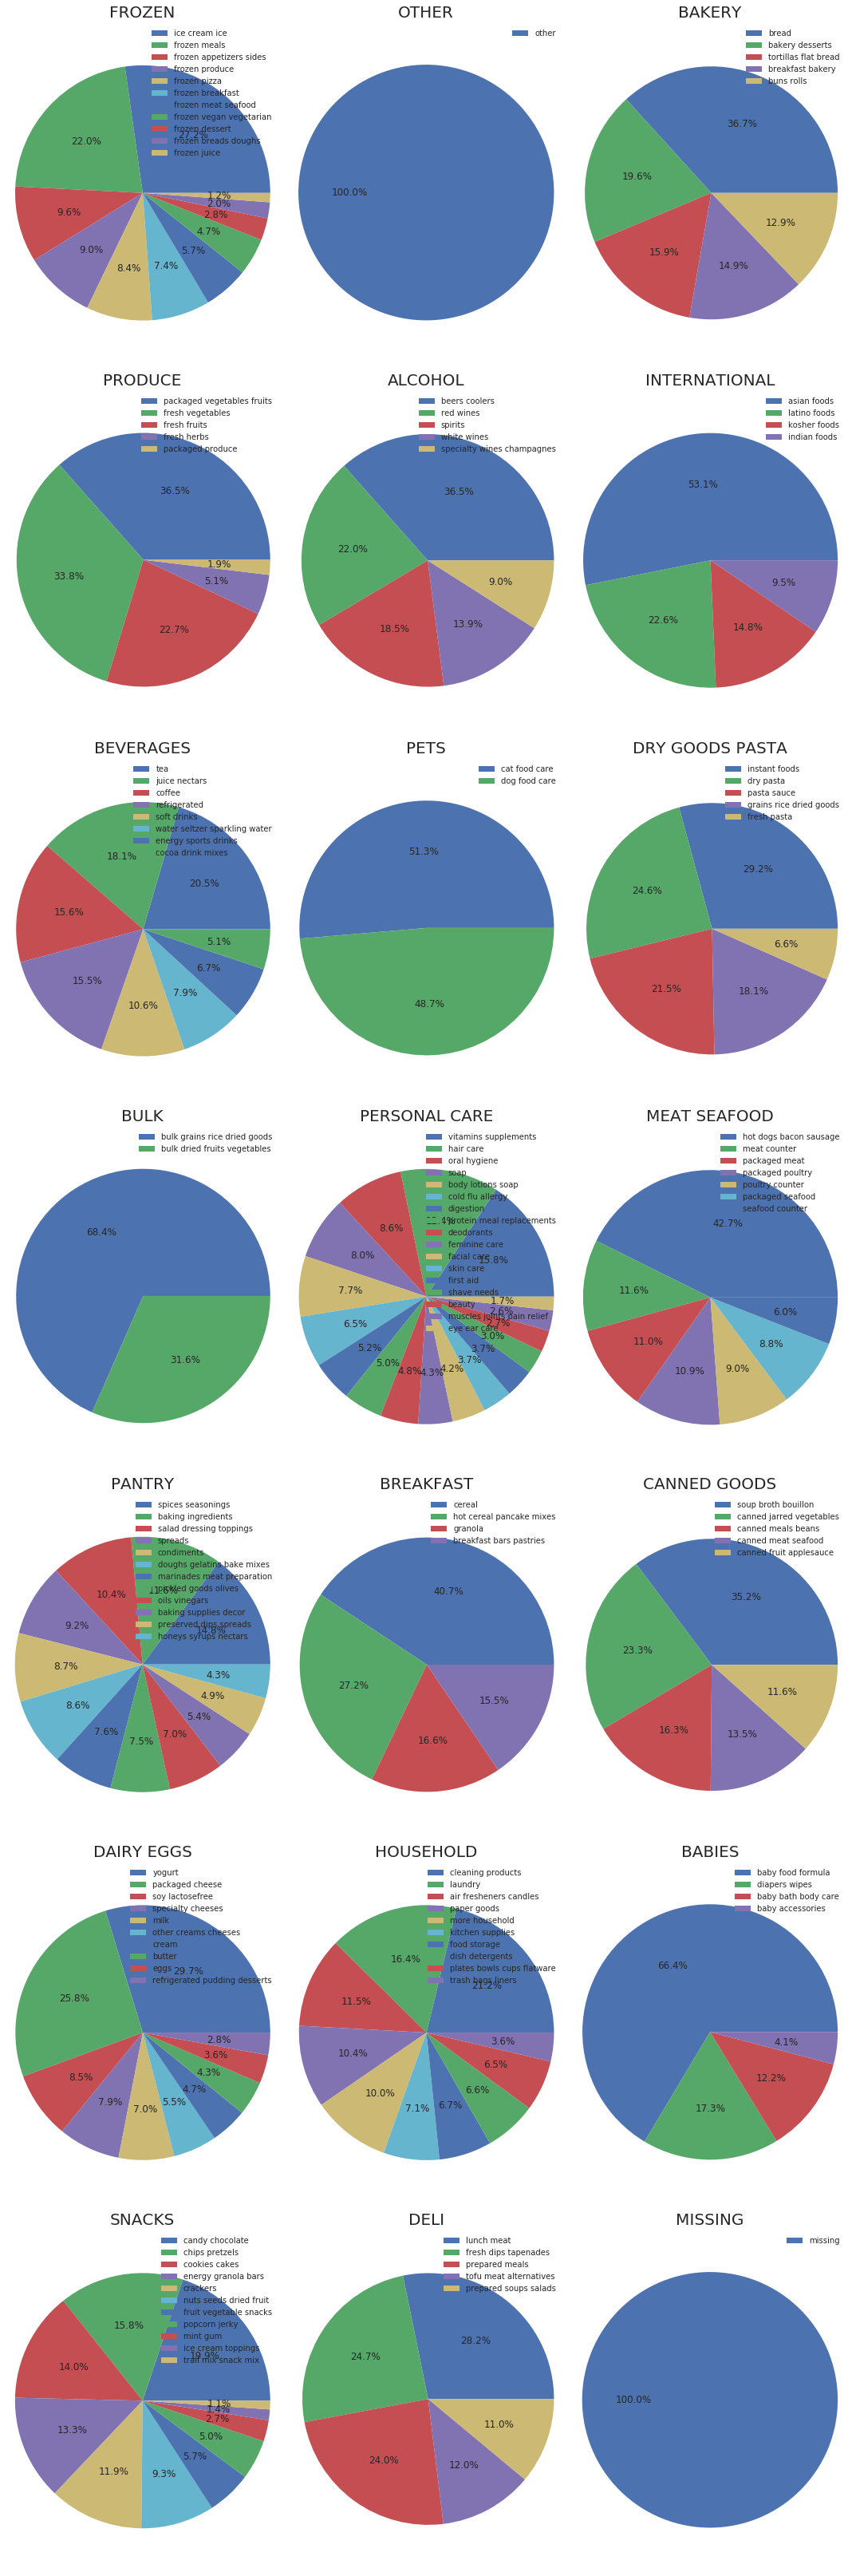

In [10]:
# product count for each aisle by department, (treemap maybe beter, but python lacks decent package for treemap)

dept_aisle_cnt = product_info.groupby(['department','aisle']).product_id.aggregate({'product_count':'count'}).reset_index()\
                .sort_values(['department','product_count'], ascending = False)

ii=1
plt.figure(figsize = (15,45))
for i in dept.department:
    plt.subplot(7,3,ii)
    dept_cnt = dept_aisle_cnt.ix[dept_aisle_cnt['department'] == i]
    plt.pie( dept_cnt.product_count, autopct='%1.1f%%')
    plt.title(i.upper(), fontsize = 20 )
    plt.axis('equal')
    plt.legend(labels =dept_cnt.aisle, loc = 'best')

    ii+=1
plt.tight_layout()

# Orders

In [11]:
orders = pd.read_csv(datadir + 'orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
print ('Total order :', len(orders))
orders.groupby('eval_set').order_id.count().reset_index()

Total order : 3421083


,eval_set,order_id
0,prior,3214874
1,test,75000
2,train,131209


### When do people order?
#### Hour of Day

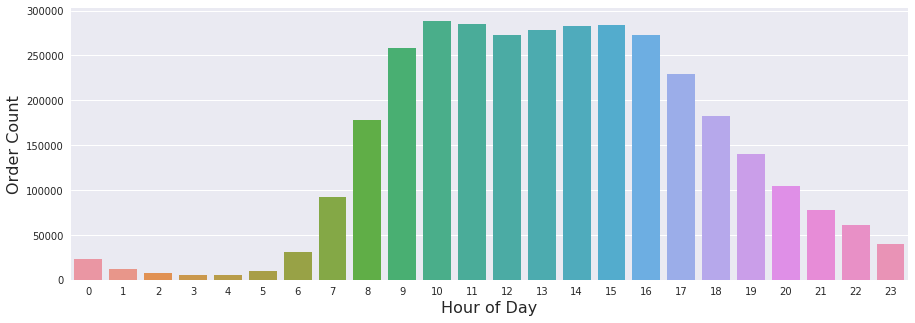

In [13]:
hod = orders.groupby('order_hour_of_day').order_id.aggregate({'order_count':'count'}).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x = 'order_hour_of_day', y='order_count', data = hod )
plt.xlabel('Hour of Day', fontsize = 16)
plt.ylabel('Order Count', fontsize = 16)
plt.show()

#### Day of Week

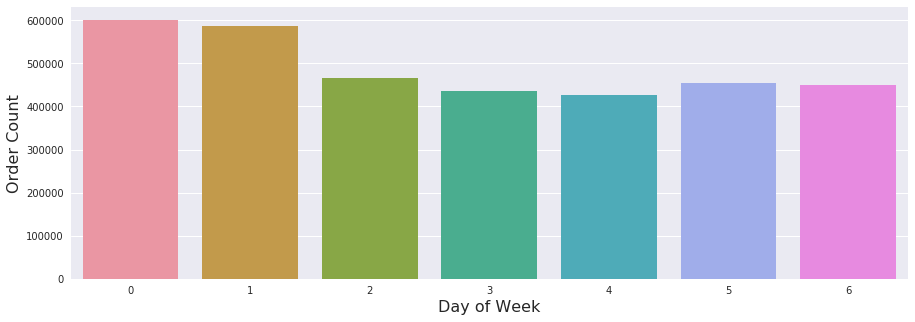

In [14]:
dow = orders.groupby('order_dow').order_id.aggregate({'order_count':'count'}).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x = 'order_dow', y='order_count', data = dow )
plt.xlabel('Day of Week', fontsize = 16)
plt.ylabel('Order Count', fontsize = 16)
plt.show()

#### How often do people order again?

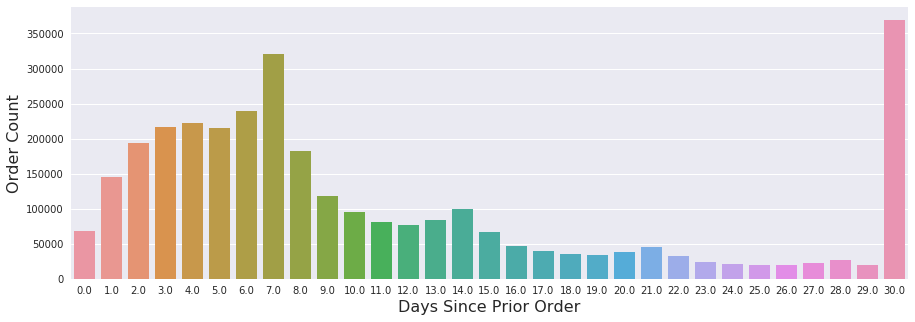

In [15]:
daysince = orders.groupby('days_since_prior_order').order_id.aggregate({'order_count':'count'}).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x = 'days_since_prior_order', y='order_count', data = daysince )
plt.xlabel('Days Since Prior Order', fontsize = 16)
plt.ylabel('Order Count', fontsize = 16)
plt.show()

#### How many orders do people order?

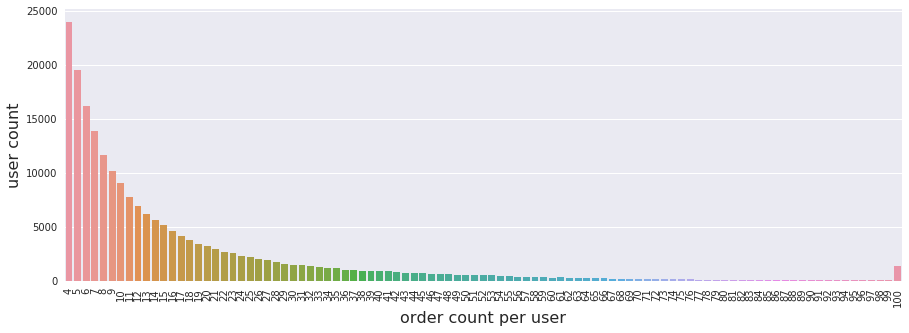

In [16]:
user_order = orders.groupby('user_id').order_id.aggregate({'order_count':'count'}).reset_index()
user_order_cnt = user_order.groupby('order_count').user_id.aggregate({'user_count':'count'}).reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = 'order_count', y = 'user_count', data = user_order_cnt)
plt.xlabel('order count per user', fontsize = 16)
plt.ylabel('user count', fontsize = 16)
plt.xticks(rotation=90)
plt.show()

# Order - Product - User

In [17]:
prior = pd.read_csv( datadir + 'order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [18]:
train = pd.read_csv(datadir + 'order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [19]:
# Merge the user_id with order_products
order_product = pd.merge( pd.concat([prior, train], axis =0), 
                         orders[['order_id','user_id', 'order_number', 'days_since_prior_order']], on = 'order_id', how='inner')
order_product.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,days_since_prior_order
0,2,33120,1,1,202279,3,8.0
1,2,28985,2,1,202279,3,8.0
2,2,9327,3,0,202279,3,8.0
3,2,45918,4,1,202279,3,8.0
4,2,30035,5,0,202279,3,8.0


In [20]:
# Some Statstics for each order, will be used later
order_product_count = order_product.groupby(['user_id','order_id']).aggregate( {'reordered':['count', 'sum'],
                                                                                'days_since_prior_order':'mean' })
order_product_count.columns = ['_'.join(col).strip() for col in order_product_count.columns.values]
order_product_count.reset_index(inplace = True)
order_product_count.rename(columns={'reordered_count': 'product_count', 'reordered_sum': 'reordered',
                                    'days_since_prior_order_mean':'days_since_prior_order'}, inplace=True)
order_product_count.head()

,user_id,order_id,days_since_prior_order,product_count,reordered
0,1,431534,28.0,8,5
1,1,473747,21.0,5,3
2,1,550135,20.0,5,5
3,1,1187899,14.0,11,10
4,1,2254736,29.0,5,5


In [21]:
# Some statstics for each product, will be user later:
product_stats = order_product.groupby(['product_id']).agg({"user_id":'nunique',  
                                                           'days_since_prior_order': 'mean','reordered':['count', 'sum']  }, )
product_stats.columns = ['_'.join(col).strip() for col in product_stats.columns.values]
product_stats.reset_index(inplace = True)
product_stats.rename(columns={'user_id_nunique': 'user_count', 'reordered_sum': 'reordered',
                                    'reordered_count':'total_count'}, inplace=True)

product_stats.head()

,product_id,user_count,days_since_prior_order_mean,total_count,reordered
0,1,743,10.710383,1928,1185
1,2,81,10.494505,94,13
2,3,74,10.800752,283,209
3,4,190,14.868590,351,161
4,5,6,13.000000,16,10


In [22]:
# For each product, merge basic statstics and basic info
product_stats = pd.merge(product_stats, product_info, on='product_id', how='left')
product_stats.head()

,product_id,user_count,days_since_prior_order_mean,total_count,reordered,product_name,aisle_id,department_id,department,aisle
0,1,743,10.710383,1928,1185,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,81,10.494505,94,13,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,74,10.800752,283,209,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,190,14.868590,351,161,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,6,13.000000,16,10,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


### Histogram of number of products per order

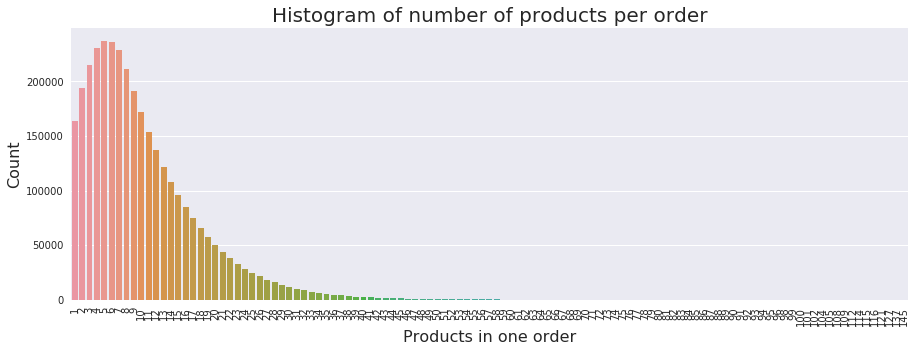

In [23]:
order_product_hist = order_product_count.groupby('product_count').order_id.aggregate({'order_count':'count'}).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x = 'product_count', y = 'order_count', data = order_product_hist)
plt.xlabel('Products in one order', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation=90)
plt.title('Histogram of number of products per order', fontsize = 20)
plt.show()

###### People tends to order less than 10 items.

#### Most Popular Products (Top 20)

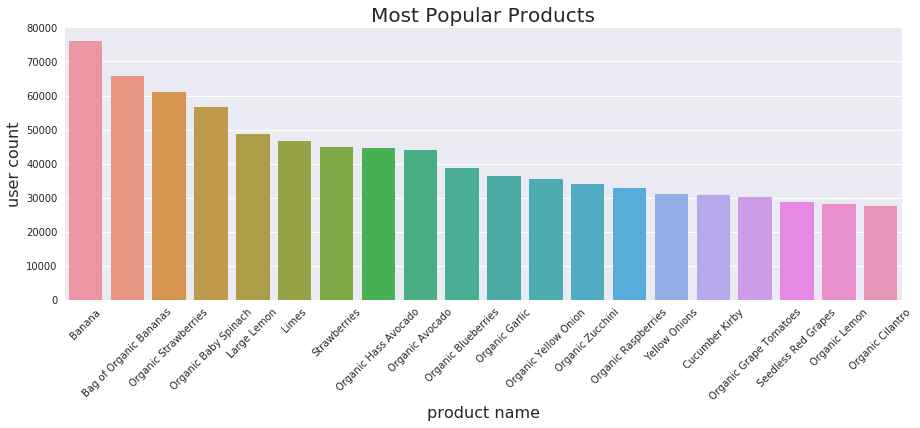

In [24]:
pop_prod = product_stats.sort_values(by='user_count', ascending = False).head(20)

plt.figure(figsize=(15,5))
sns.barplot(x='product_name', y = 'user_count', data = pop_prod)
plt.xlabel('product name' , fontsize = 16)
plt.ylabel('user count', fontsize =16)
plt.title('Most Popular Products', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

#### Bestsellers (Top20)

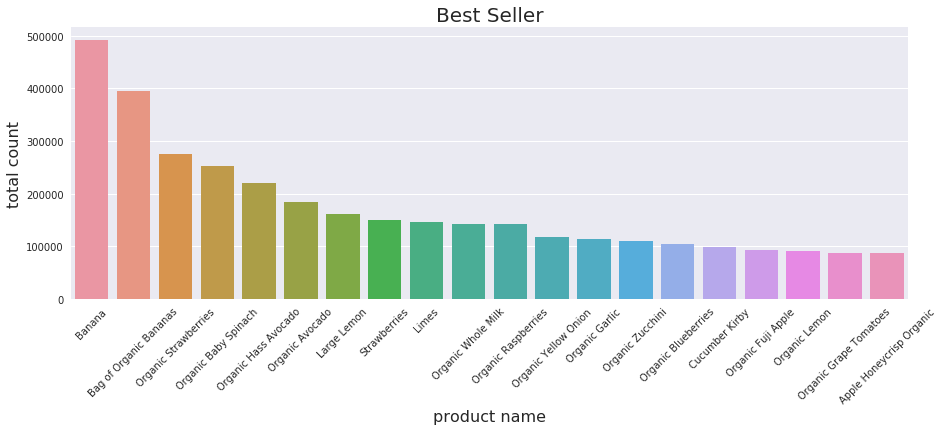

In [25]:
bestsellers = product_stats.sort_values(by='total_count', ascending = False).head(20)

plt.figure(figsize=(15,5))
sns.barplot(x='product_name', y = 'total_count', data = bestsellers)
plt.xlabel('product name' , fontsize = 16)
plt.ylabel('total count', fontsize =16)
plt.title('Best Seller', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

#### Most Reordered Product

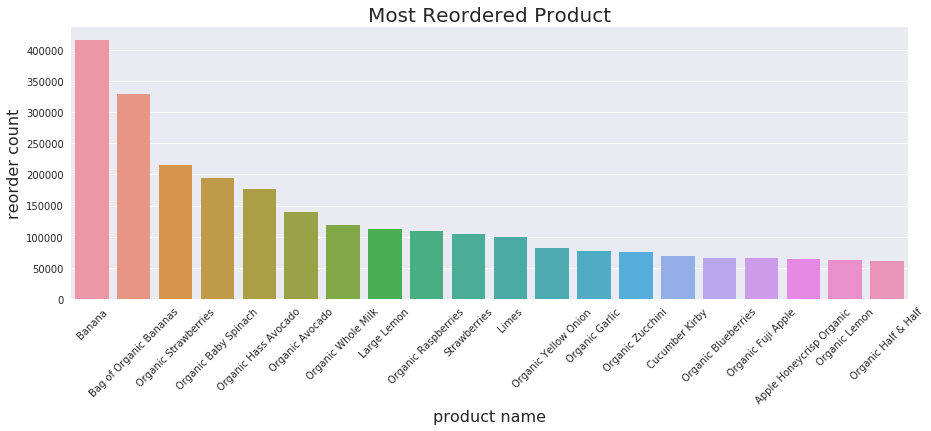

In [26]:
mostreordered = product_stats.sort_values(by='reordered', ascending = False).head(20)

plt.figure(figsize=(15,5))
sns.barplot(x='product_name', y = 'reordered', data = mostreordered)
plt.xlabel('product name' , fontsize = 16)
plt.ylabel('reorder count', fontsize =16)
plt.title('Most Reordered Product', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

### Best Selling Department

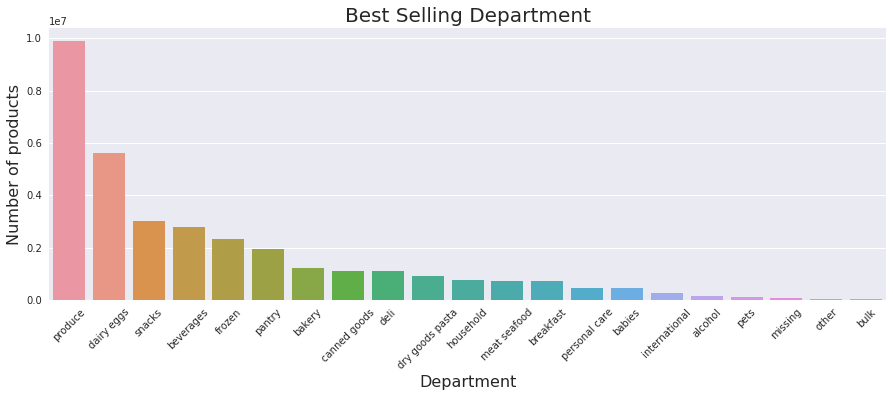

In [27]:
bestDept = product_stats.groupby('department').total_count.sum().reset_index().sort_values(by='total_count', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x = 'department', y = 'total_count', data = bestDept)
plt.xlabel('Department', fontsize = 16)
plt.ylabel('Number of products', fontsize = 16 )
plt.title('Best Selling Department', fontsize = 20)
plt.xticks(rotation=45)
plt.show()

### Best Selling Aisles

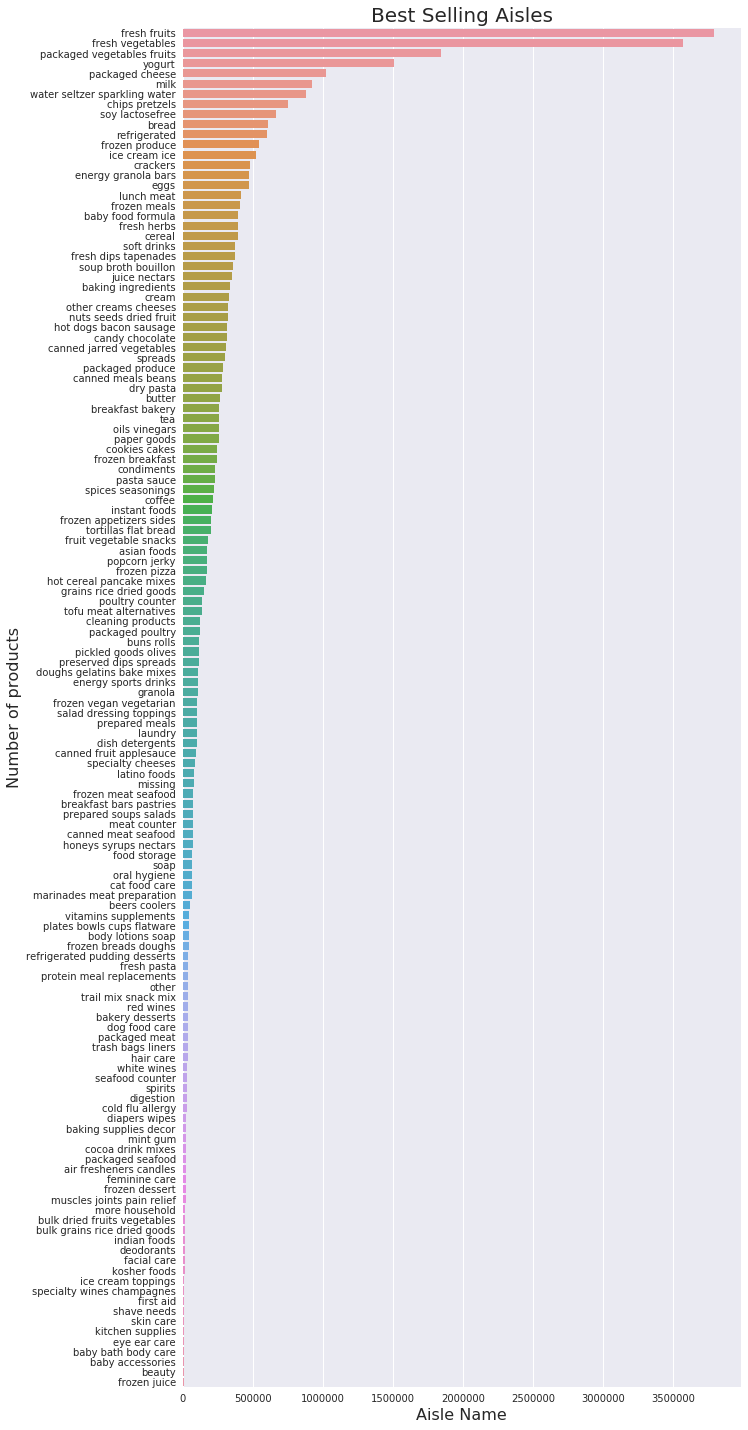

In [28]:
bestAisle = product_stats.groupby('aisle').total_count.sum().reset_index().sort_values(by='total_count', ascending=False)

plt.figure(figsize=(10,25))
sns.barplot(y = 'aisle', x = 'total_count', data = bestAisle)
plt.xlabel('Aisle Name', fontsize = 16)
plt.ylabel('Number of products', fontsize = 16 )
plt.title('Best Selling Aisles', fontsize = 20)
plt.show()

### Frequency of the  Products Reorder

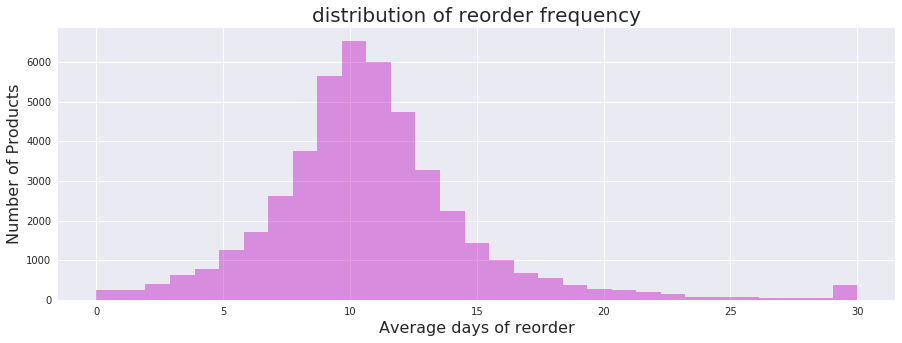

In [29]:
reordered_product = order_product.ix[order_product['reordered']==1].groupby('product_id')\
                   .days_since_prior_order.aggregate({'avg_day':'mean'}).reset_index().sort_values(by = 'avg_day')
plt.figure(figsize=(15,5))
sns.distplot(reordered_product.avg_day, bins = 31, color = 'm', kde=False)
plt.title('distribution of reorder frequency', fontsize= 20)
plt.xlabel("Average days of reorder", fontsize = 16)
plt.ylabel('Number of Products', fontsize = 16)
plt.show()

###### Most of the products were reordered between 1-2 weeks.

### Reorder Ratio

In [30]:
order_product_count['reorder_ratio'] = order_product_count['reordered']/order_product_count['product_count']*100
print("Among all ", len(order_product_count), ' orders,', 
      "the average reorder ratio  is" ,'{:.2f}'.format(order_product_count.reorder_ratio.mean()) ,"%" )

print ('{:.2f}'.format(len(order_product_count.ix[order_product_count.reorder_ratio ==100.0 ])/len(order_product_count) *100),
       "% of orders with reorder ratio 100%")
print ('{:.2f}'.format(len(order_product_count.ix[order_product_count.reorder_ratio ==0.0 ])/len(order_product_count) *100),
       "% of orders with reorder ratio 0%")
print ('{:.2f}'.format(len(order_product_count.ix[order_product_count.reorder_ratio ==50.0 ])/len(order_product_count) *100),
       "% of orders with reorder ratio 0%")

Among all  3346083  orders, the average reorder ratio  is 59.88 %
21.49 % of orders with reorder ratio 100%
11.87 % of orders with reorder ratio 0%
5.88 % of orders with reorder ratio 0%


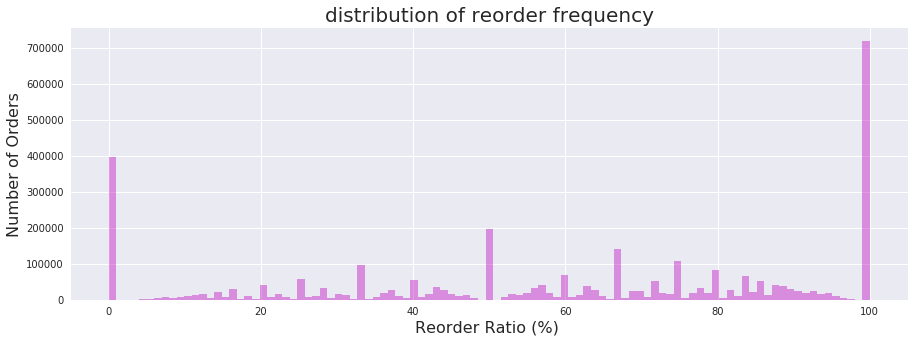

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(order_product_count.reorder_ratio, bins = 101, color = 'm', kde = False)
plt.title('distribution of reorder frequency', fontsize= 20)
plt.xlabel("Reorder Ratio (%) ", fontsize = 16)
plt.ylabel('Number of Orders', fontsize = 16)
plt.show()

# User Statstics

In [32]:
user_stats =  order_product_count.groupby('user_id').agg({'order_id':"count", 'reorder_ratio':'mean',
                                                          'days_since_prior_order':'mean'}).reset_index()
user_stats.rename(columns={'order_id': 'order_count','days_since_prior_order':'order_frequency'}, inplace=True)
user_stats.head()

,user_id,reorder_ratio,order_count,order_frequency
0,1,72.431129,11,19.000000
1,2,44.390335,15,16.285714
2,3,65.881734,12,12.090909
3,4,2.857143,5,13.750000
4,5,39.111111,5,11.500000


### Order number vs Reorder ratio by User

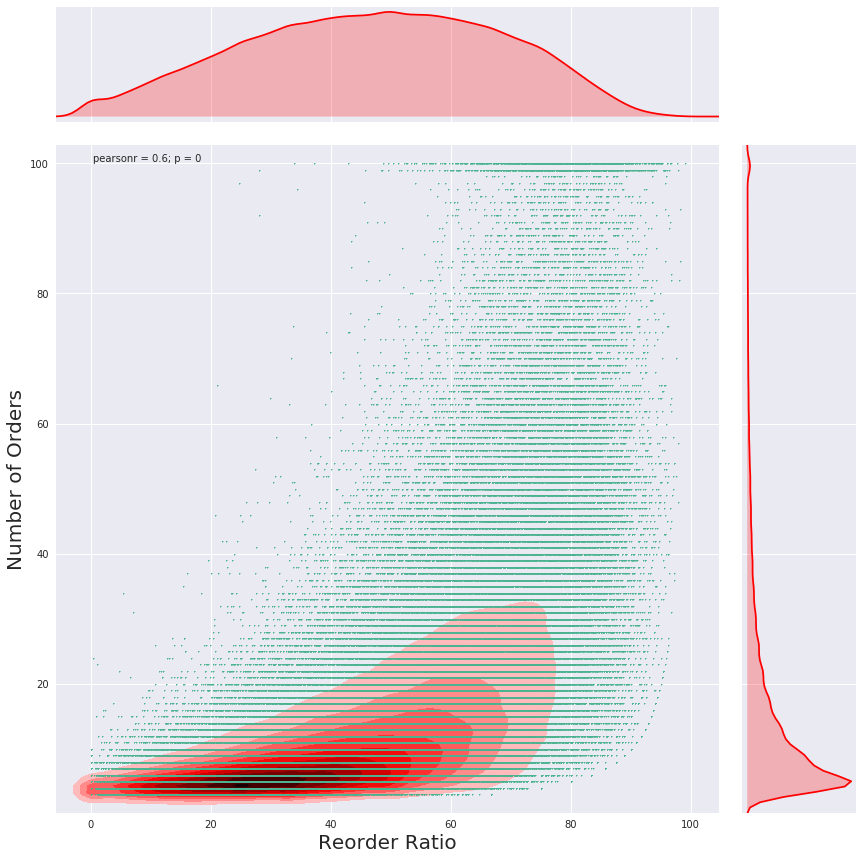

In [33]:
g = sns.jointplot(user_stats.reorder_ratio, user_stats.order_count, kind="kde", color="r", size = 12)
g.plot_joint(plt.scatter, c="#4CB391", s=1, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('Reorder Ratio', "Number of Orders", fontsize =20)
plt.show()

### Order Freqency vs Reorder ratio by User

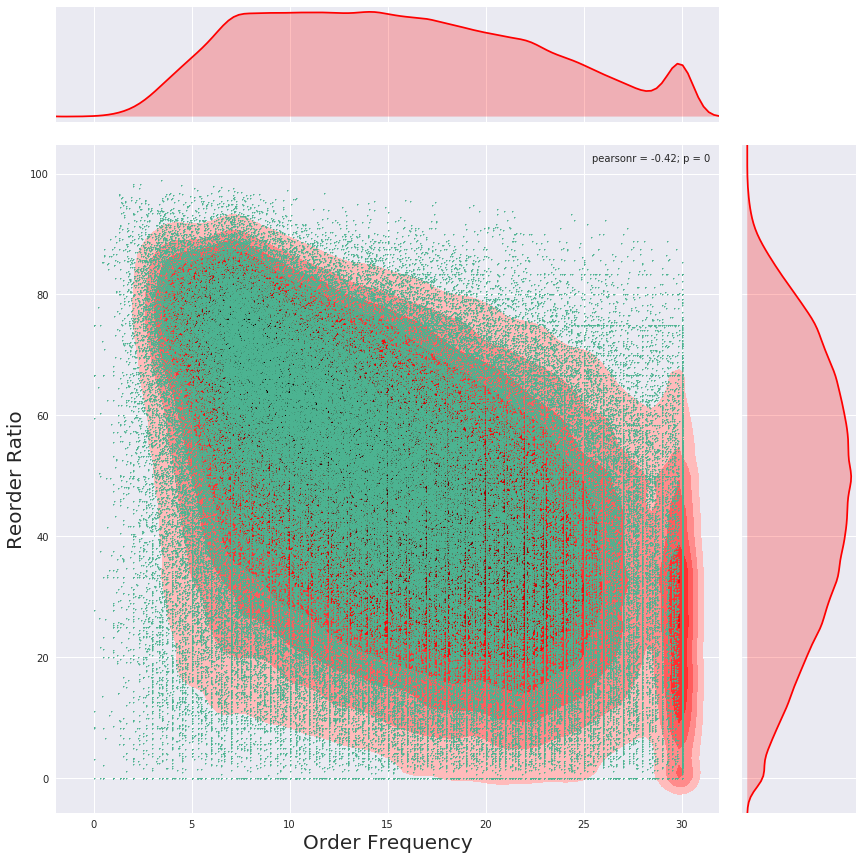

In [34]:
g = sns.jointplot(user_stats.order_frequency, user_stats.reorder_ratio, kind="kde", color='r', size = 12)
g.plot_joint(plt.scatter, c="#4CB391", s=1, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('Order Frequency','Reorder Ratio', fontsize =20)
plt.show()

### Order number vs Order Frequency by User

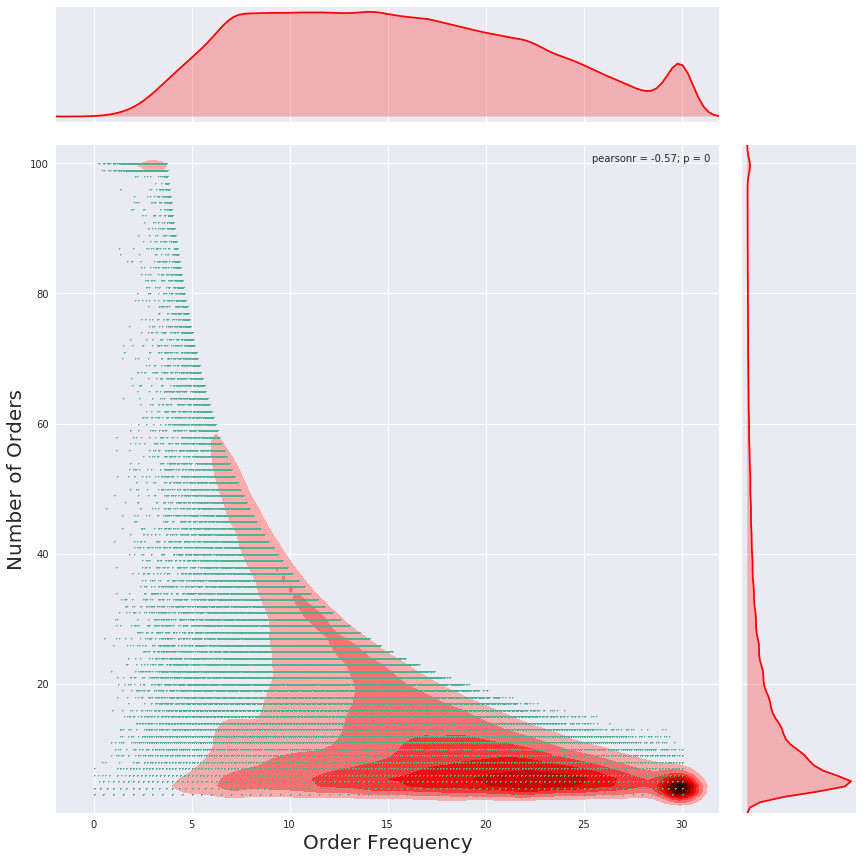

In [35]:
g = sns.jointplot(user_stats.order_frequency, user_stats.order_count, kind="kde", color='r', size = 12)
g.plot_joint(plt.scatter, c="#4CB391", s=1, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('Order Frequency', "Number of Orders", fontsize = 20)
plt.show()

# User Behavior / Habbit

### People who like order multiple times in the same day

In [36]:
selected = order_product.ix[order_product['days_since_prior_order']==0].groupby(['user_id', 'order_id'])\
           .reordered.agg({'total_count':'count', 'reorder_count':'sum'}).reset_index()

print("There are" ,len(selected), 'orders placed on the same day' )

selected['reorder_ratio'] = selected['reorder_count']/selected['total_count']*100
print("Among these orders, ", "the average reorder ratio  is" ,'{:.2f}'.format(selected.reorder_ratio.mean()) ,"%" )

print ('{:.2f}'.format(len(selected.ix[selected.reorder_ratio ==100.0 ])/len(selected) *100),
       "% of orders with reorder ratio 100%")
print ('{:.2f}'.format(len(selected.ix[selected.reorder_ratio ==0.0 ])/len(selected) *100),
       "% of orders with reorder ratio 0%")
print ('{:.2f}'.format(len(selected.ix[selected.reorder_ratio ==50.0 ])/len(selected) *100),
       "% of orders with reorder ratio 0%")

There are 66562 orders placed on the same day
Among these orders,  the average reorder ratio  is 69.93 %
45.05 % of orders with reorder ratio 100%
11.95 % of orders with reorder ratio 0%
6.15 % of orders with reorder ratio 0%


###### More orders with reorder ratio 100% than normal

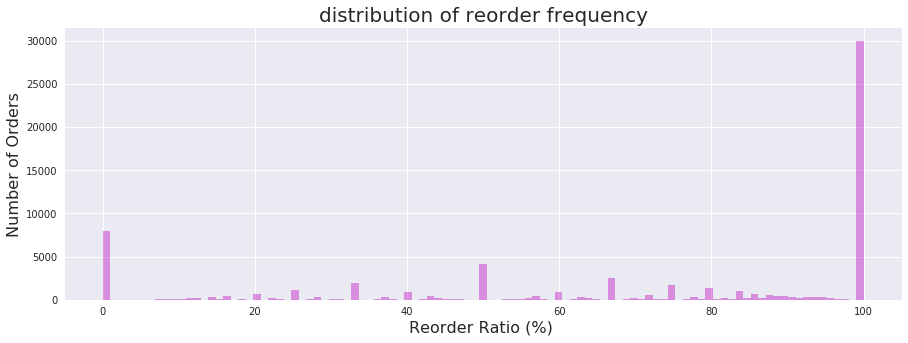

In [37]:
plt.figure(figsize=(15,5))
sns.distplot(selected.reorder_ratio, bins = 101, color = 'm', kde = False)
plt.title('distribution of reorder frequency', fontsize= 20)
plt.xlabel("Reorder Ratio (%) ", fontsize = 16)
plt.ylabel('Number of Orders', fontsize = 16)
plt.show()

In [38]:
grouped = selected.groupby('user_id').order_id.agg({'order_count':'count'}).reset_index().\
          sort_values(by='order_count', ascending = False)
print(len(grouped), 'users place orders multiple time on the same day')

32504 users place orders multiple time on the same day


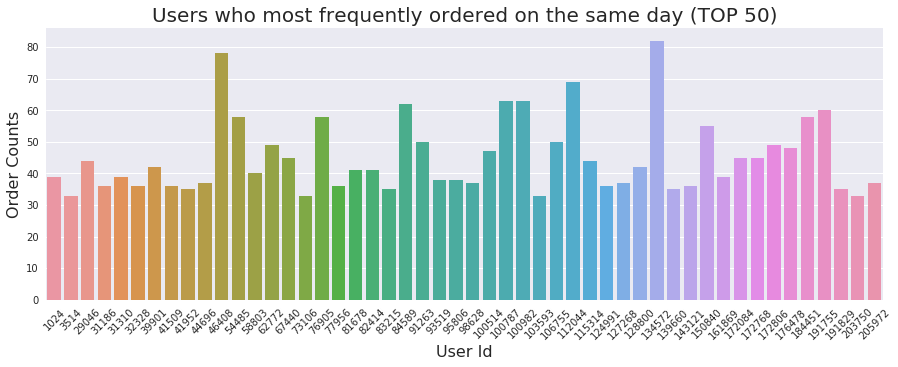

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'user_id', y='order_count', data=grouped.head(50))
plt.xticks(rotation=45)
plt.title("Users who most frequently ordered on the same day (TOP 50)", fontsize=20)
plt.xlabel('User Id', fontsize = 16)
plt.ylabel("Order Counts", fontsize = 16)
plt.show()

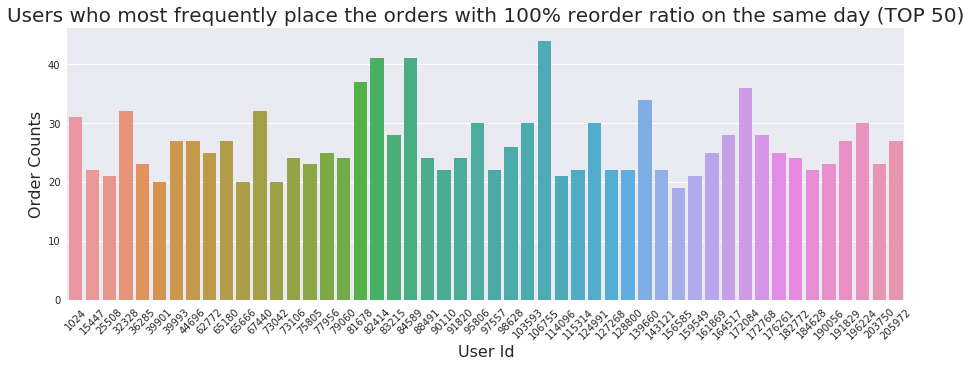

In [40]:
grouped2 = selected.ix[selected.reorder_ratio ==100].groupby('user_id').order_id.agg({'order_count':'count'}).reset_index()\
           .sort_values(by='order_count', ascending = False)
plt.figure(figsize=(15,5))
sns.barplot(x = 'user_id', y='order_count', data=grouped2.head(50))
plt.xticks(rotation=45)
plt.title("Users who most frequently place the orders with 100% reorder ratio on the same day (TOP 50)", fontsize=20)
plt.xlabel('User Id', fontsize = 16)
plt.ylabel("Order Counts", fontsize = 16)
plt.show()

### People who like order only 1 product

In [41]:
selected = order_product_count.ix[order_product_count['product_count']==1]
print("Among all", len(selected), "orders, ", "the average reorder ratio  is" ,
      '{:.2f}'.format(selected.reorder_ratio.mean()) ,"%" )

print ('{:.2f}'.format(len(selected.ix[selected.reorder_ratio ==100.0 ])/len(selected) *100),
       "% of orders with reorder ratio 100%")
print ('{:.2f}'.format(len(selected.ix[selected.reorder_ratio ==0.0 ])/len(selected) *100),
       "% of orders with reorder ratio 0%")
print ('{:.2f}'.format(len(selected.ix[selected.reorder_ratio ==50.0 ])/len(selected) *100),
       "% of orders with reorder ratio 0%")

Among all 163593 orders,  the average reorder ratio  is 66.82 %
66.82 % of orders with reorder ratio 100%
33.18 % of orders with reorder ratio 0%
0.00 % of orders with reorder ratio 0%


In [42]:
grouped = selected.groupby('user_id').order_id.agg({'order_count':'count'}).reset_index()\
          .sort_values(by='order_count', ascending = False)
print(len(grouped), 'users place orders with only 1 product')

59333 users place orders with only 1 product


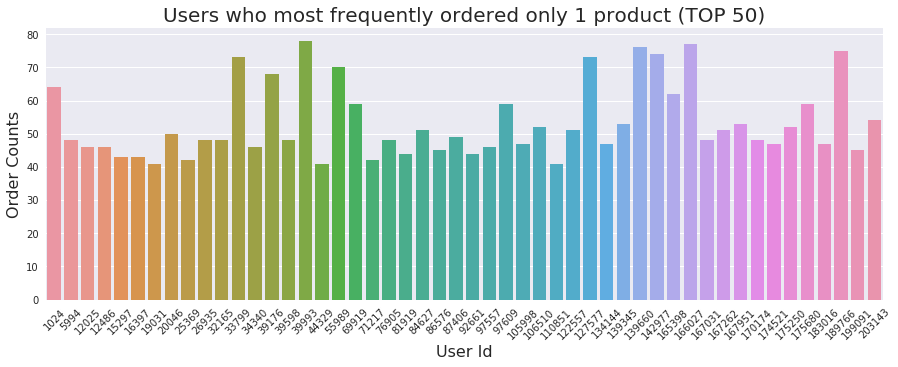

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'user_id', y='order_count', data=grouped.head(50))
plt.xticks(rotation=45)
plt.title("Users who most frequently ordered only 1 product (TOP 50)", fontsize=20)
plt.xlabel('User Id', fontsize = 16)
plt.ylabel("Order Counts", fontsize = 16)
plt.show()

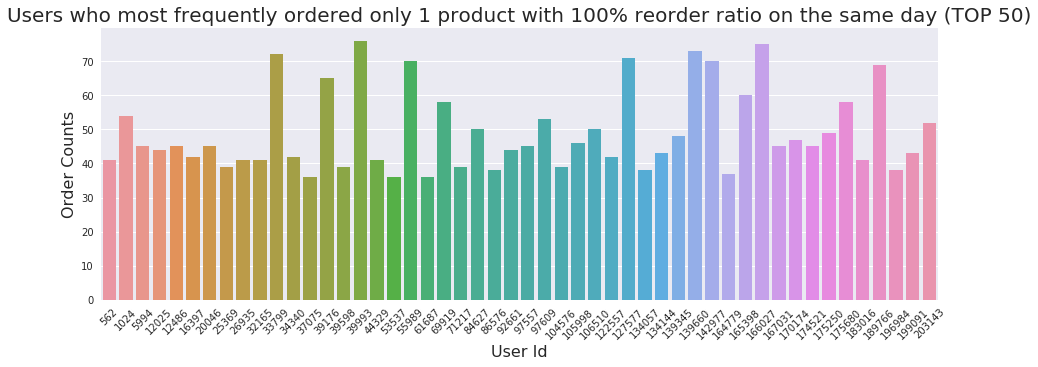

In [44]:
grouped2 = selected.ix[selected.reorder_ratio ==100].groupby('user_id').order_id.agg({'order_count':'count'}).reset_index()\
           .sort_values(by='order_count', ascending = False)
plt.figure(figsize=(15,5))
sns.barplot(x = 'user_id', y='order_count', data=grouped2.head(50))
plt.xticks(rotation=45)
plt.title("Users who most frequently ordered only 1 product with 100% reorder ratio on the same day (TOP 50)", fontsize=20)
plt.xlabel('User Id', fontsize = 16)
plt.ylabel("Order Counts", fontsize = 16)
plt.show()

### People who like place orders with 100% reorder ratio

In [45]:
selected = order_product_count.ix[order_product_count.reorder_ratio == 100]
print("Among all", len(order_product_count), "orders, ", len(selected) ,'orders have 100% reorder ratio (',
      '{:.2f}'.format(len(selected)/len(order_product_count)*100) ,"% )" ) 

Among all 3346083 orders,  719207 orders have 100% reorder ratio ( 21.49 % )


In [46]:
grouped = selected.groupby('user_id').order_id.agg({'order_count':'count'}).reset_index()\
          .sort_values(by='order_count', ascending = False)
print(len(grouped), 'users place orders with 100% reorder ratio')

117112 users place orders with 100% reorder ratio


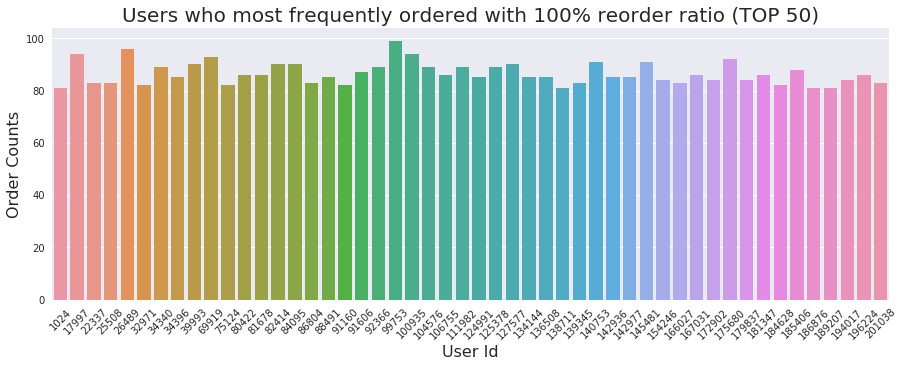

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'user_id', y='order_count', data=grouped.head(50))
plt.xticks(rotation=45)
plt.title("Users who most frequently ordered with 100% reorder ratio (TOP 50)", fontsize=20)
plt.xlabel('User Id', fontsize = 16)
plt.ylabel("Order Counts", fontsize = 16)
plt.show()

## Reorder ratio vs add_to_cart_order

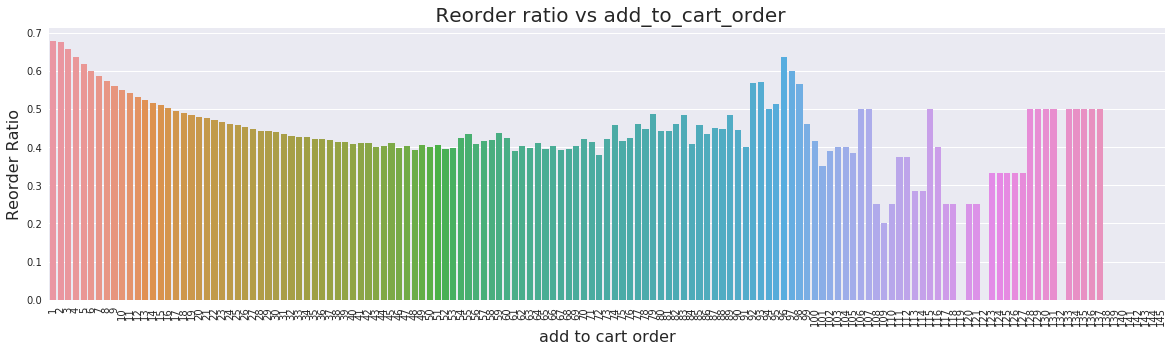

In [48]:
grouped = order_product.groupby('add_to_cart_order').reordered.agg({'count':'count', 'reordered':'sum'}).reset_index()
grouped["reorder_ratio"] = grouped['reordered']/grouped['count']
plt.figure(figsize=(20,5))
sns.barplot(x='add_to_cart_order', y='reorder_ratio', data = grouped)
plt.xticks(rotation=90)
plt.xlabel('add to cart order', fontsize = 16)
plt.ylabel('Reorder Ratio', fontsize = 16)
plt.title(" Reorder ratio vs add_to_cart_order", fontsize = 20)
plt.show()

###### For those add_to_cart_order < 50, reorder ratio decreased as the add_to_cart_order increased.

## Products which people like to add to cart first

In [49]:
grouped = order_product.ix[order_product['add_to_cart_order']==1].groupby('product_id').user_id\
        .agg({'order_count':"count", 'user_count':'nunique'}).reset_index()
grouped = pd.merge(grouped, product_info, on='product_id', how = 'left')

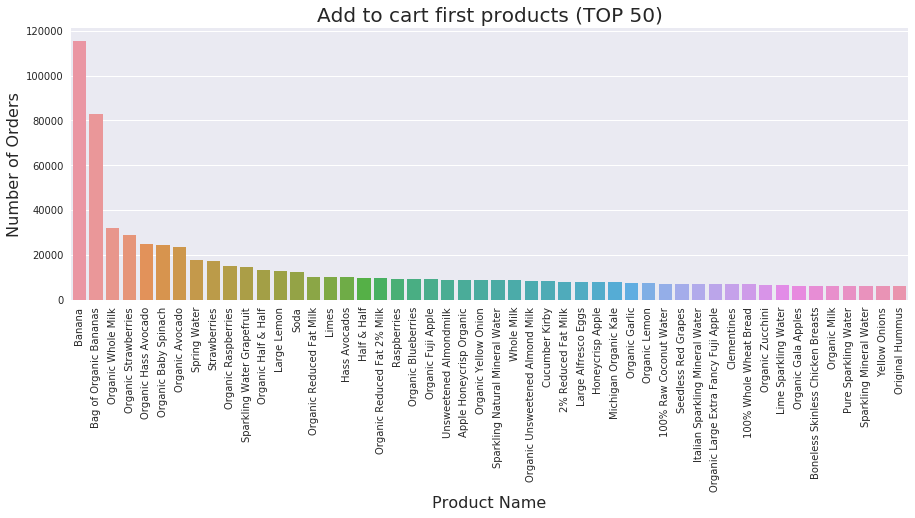

In [50]:
plt.figure(figsize = (15,5))
sns.barplot(x='product_name', y='order_count', data = grouped.sort_values(by='order_count', ascending=False).head(50))
plt.xticks(rotation=90)
plt.xlabel("Product Name", fontsize = 16)
plt.ylabel('Number of Orders', fontsize = 16)
plt.title('Add to cart first products (TOP 50)', fontsize = 20)
plt.show()